<a href="https://colab.research.google.com/github/christythessa/pemrograman-python/blob/main/CHRISTY%20THESSA%20NAULI_1101184506_TTX-01_TUBES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama:** Christy Thessa Nauli

**NIM:** 1101184506

**Kelas:** TTX-01

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tipe_area=['Urban','Suburban','Open']
fr = [700, 900, 1800]
tower = 80 #meter
user = 1.5 #meter
d = np.arange(300, 1001, 2)
#print(d)
ptx = 30000 #mW
gtx = 10 #dB
grx = 2 #dB
BW = 5000000 #Hz

NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

ptx_dbm = NtL(ptx) #dalam dBm

**FUNGSI PATHLOSS**

In [ ]:
def cos(fr,tipe,tower,user,d):
  #f = fr (MHz)
  #tipe = urban, suburban, open
  #tower = tinggi tower (meter)
  #user = tinggi user (meter)
  #d = jarak (meter)
    if fr in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif fr in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='Urban' :
        Cm=0
    elif tipe=='Suburban' :
        Cm= -2*((np.log10((fr/28)**2))-5.4)
    elif tipe=='Open' :
        Cm= -4.78*(np.log10(fr))+18.33*(np.log10(fr))-40.94
    else :
        Cm='tipe salah'
    
    auser = (1.1*np.log10(fr)-0.7)*user-(1.56*np.log10(fr)-1.8)
    Lp = Ca+(Cb*np.log10(fr))-(13.83*np.log(tower))-auser+((44.9-6.55*np.log10(tower))*np.log10(d))-Cm
    
    return Lp

**FUNGSI DAYA TERIMA**

In [ ]:
def daya_terima(LP,ptx_dbm, gtx,grx):
  prx = ptx_dbm - LP + gtx + grx
  return prx

**FUNGSI SNR**

In [ ]:
def snr_rumus(prx,BW):
  No = -174 + 10*np.log10(BW)
  No_num = LtN(No)
  SNR = prx/No_num
  return SNR

**FUNGSI KAPASITAS SELULER**

In [ ]:
def caps(d, SNR, BW):
  one = [1]
  one_list = []
  hasil_list = []
  for i in range(len(SNR)):
    one_list = one * len(SNR)
    hasil = one_list[i] + SNR[i]
    hasil_list.append(hasil)
  kapasitas = BW * np.log2(hasil_list)
  return kapasitas

**FUNGSI PATHLOSS 1**

In [ ]:
pathloss_Urban = []
pathloss_Suburban = []
pathloss_Open = []

#Urban
def pl_Urban(d,fr,tipe_area,tower,user):
  f = fr[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,tower,user,d)
    return Urban_1800
pathloss_Urban = pl_Urban(d,fr,tipe_area,tower,user)

#Suburban
def pl_Suburban(d,fr,tipe_area,tower,user):
  f = fr[2]
  tipe = tipe_area[1]
  for i in range(len(d)):
    Suburban_1800 = cos(f,tipe,tower,user,d)
    return Suburban_1800
pathloss_Suburban = pl_Suburban(d,fr,tipe_area,tower,user)

#Open
def pl_Open(d,fr,tipe_area,tower,user):
  f = fr[2]
  tipe = tipe_area[2]
  for i in range(len(d)):
    Open_1800 = cos(f,tipe,tower,user,d)
    return Open_1800
pathloss_Open = pl_Open(d,fr,tipe_area,tower,user)

**FUNGSI PRX 1**

In [ ]:
dayaterima_Urban = []
dayaterima_Suburban = []
dayaterima_Open = []

#prx Urban
def prx_Urban(pathloss_Urban,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Urban)):
    x = daya_terima(pathloss_Urban,ptx_dbm,gtx,grx)
    x_num = LtN(x)
    return x_num
dayaterima_Urban = prx_Urban(pathloss_Urban,ptx_dbm,gtx,grx)

#prx Suburban
def prx_Suburban(pathloss_Suburban,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Suburban)):
    y = daya_terima(pathloss_Suburban,ptx_dbm,gtx,grx)
    y_num = LtN(y)
    return y_num
dayaterima_Suburban = prx_Suburban(pathloss_Suburban,ptx_dbm,gtx,grx)

#prx Open
def prx_Open(pathloss_Open,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_Open)):
    z = daya_terima(pathloss_Open,ptx_dbm,gtx,grx)
    z_num = LtN(z)
    return z_num
dayaterima_Open = prx_Open(pathloss_Open,ptx_dbm,gtx,grx)

**FUNGSI SNR 1**

In [ ]:
SNR_Urban = []
SNR_Suburban = []
SNR_Open = []

#snr Urban
def snr_Urban(BW,dayaterima_Urban):
  for i in range(len(dayaterima_Urban)):
    snrU = snr_rumus(dayaterima_Urban,BW)
    return snrU
SNR_Urban = snr_Urban(BW,dayaterima_Urban)
#print(SNR_Urban)

#snr Suburban
def snr_Suburban(BW,dayaterima_Suburban):
  for i in range(len(dayaterima_Suburban)):
    snrS = snr_rumus(dayaterima_Suburban,BW)
    return snrS
SNR_Suburban = snr_Suburban(BW,dayaterima_Suburban)
#print(SNR_Suburban)

#snr Open
def snr_Open(BW,dayaterima_Open):
  for i in range(len(dayaterima_Open)):
    snrO = snr_rumus(dayaterima_Open,BW)
    return snrO
SNR_Open = snr_Open(BW,dayaterima_Open)
#print(SNR_Open)

**FUNGSI KAPASITAS SELULER 1**

In [ ]:
KP_Urban = []
KP_Suburban = []
KP_Open = []

#Urban
def kp_urban(d, SNR_Urban, BW):
  for i in range(len(SNR_Urban)):
    kpU = caps(d, SNR_Urban, BW)
  return kpU
KP_Urban = kp_urban(d, SNR_Urban, BW)

#Suburban
def kp_suburban(d, SNR_Suburban, BW):
  for i in range(len(SNR_Suburban)):
    kpS = caps(d, SNR_Suburban, BW)
  return kpS
KP_Suburban = kp_suburban(d, SNR_Suburban, BW)

#Open
def kp_open(d, SNR_Open, BW):
  for i in range(len(SNR_Open)):
    kpO = caps(d, SNR_Open, BW)
  return kpO
KP_Open = kp_open(d, SNR_Open, BW)

**FUNGSI PATHLOSS 2**

In [ ]:
pathloss_700 = []
pathloss_900 = []
pathloss_1800 = []

#700
def pl_700(d,fr,tipe_area,tower,user):
  f = fr[0]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_700 = cos(f,tipe,tower,user,d)
    return Urban_700
pathloss_700 = pl_700(d,fr,tipe_area,tower,user)

#900
def pl_900(d,fr,tipe_area,tower,user):
  f = fr[1]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_900 = cos(f,tipe,tower,user,d)
    return Urban_900
pathloss_900 = pl_900(d,fr,tipe_area,tower,user)

#1800
def pl_1800(d,fr,tipe_area,tower,user):
  f = fr[2]
  tipe = tipe_area[0]
  for i in range(len(d)):
    Urban_1800 = cos(f,tipe,tower,user,d)
    return Urban_1800
pathloss_1800 = pl_1800(d,fr,tipe_area,tower,user)

**FUNGSI PRX 2**

In [ ]:
dayaterima_700 = []
dayaterima_900 = []
dayaterima_1800 = []

#prx 700
def prx_700(pathloss_700,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_700)):
    a = daya_terima(pathloss_700,ptx_dbm,gtx,grx)
    a_num = LtN(a)
    return a_num
dayaterima_700 = prx_700(pathloss_700,ptx_dbm,gtx,grx)

#prx 900
def prx_900(pathloss_900,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_900)):
    b = daya_terima(pathloss_900,ptx_dbm,gtx,grx)
    b_num = LtN(b)
    return b_num
dayaterima_900 = prx_900(pathloss_900,ptx_dbm,gtx,grx)

#prx 1800
def prx_1800(pathloss_1800,ptx_dbm,gtx,grx):
  for i in range(len(pathloss_1800)):
    c = daya_terima(pathloss_1800,ptx_dbm,gtx,grx)
    c_num = LtN(c)
    return c_num
dayaterima_1800 = prx_1800(pathloss_1800,ptx_dbm,gtx,grx)

**FUNGSI SNR 2**

In [ ]:
SNR_700 = []
SNR_900 = []
SNR_1800 = []

#snr 700
def snr_700(BW,dayaterima_700):
  for i in range(len(dayaterima_700)):
    snr1 = snr_rumus(dayaterima_700,BW)
    return snr1
SNR_700 = snr_700(BW,dayaterima_700)
#print(SNR_700)

#snr 900
def snr_900(BW,dayaterima_900):
  for i in range(len(dayaterima_900)):
    snr2 = snr_rumus(dayaterima_900,BW)
    return snr2
SNR_900 = snr_900(BW,dayaterima_900)
#print(SNR_900)


#snr 1800
def snr_1800(BW,dayaterima_1800):
  for i in range(len(dayaterima_1800)):
    snr3 = snr_rumus(dayaterima_1800,BW)
    return snr3
SNR_1800 = snr_1800(BW,dayaterima_1800)
#print(SNR_1800)

**FUNGSI KAPASITAS SELULER 2**

In [ ]:
KP_700 = []
KP_900 = []
KP_1800 = []

#700
def kp_700(d, SNR_700, BW):
  for i in range(len(SNR_700)):
    kp1 = caps(d, SNR_700, BW)
    return kp1
KP_700 = kp_700(d, SNR_700, BW)

#900
def kp_900(d, SNR_900, BW):
  for i in range(len(SNR_900)):
    kp2 = caps(d, SNR_900, BW)
    return kp2
KP_900 = kp_900(d, SNR_900, BW)

#1800
def kp_1800(d, SNR_1800, BW):
  for i in range(len(SNR_1800)):
    kp3 = caps(d, SNR_1800, BW)
    return kp3
KP_1800 = kp_1800(d, SNR_1800, BW)

**GRAFIK**

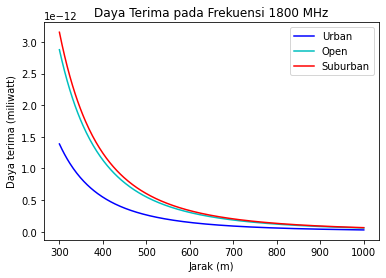

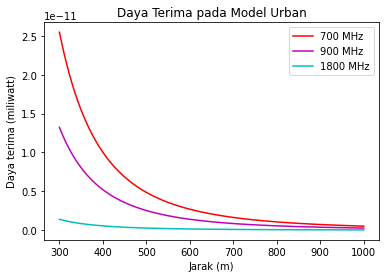

In [ ]:
#Grafik daya terima 
def graphprx_1():
  plt.figure()
  plt.plot(d,dayaterima_Urban,'b', label='Urban')
  plt.plot(d,dayaterima_Open,'c', label='Open')
  plt.plot(d,dayaterima_Suburban,'r', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()
 
def graphprx_2():
  plt.figure()
  plt.plot(d,dayaterima_700,'r', label='700 MHz')
  plt.plot(d,dayaterima_900,'m', label='900 MHz')
  plt.plot(d,dayaterima_1800,'c', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (miliwatt)")
  plt.show()

graphprx_1()
graphprx_2()

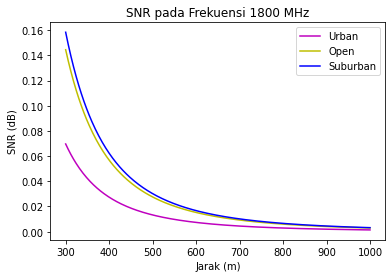

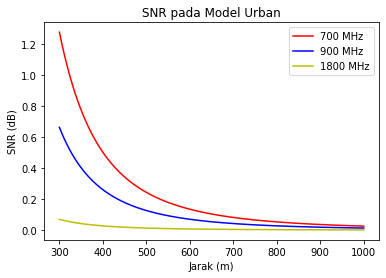

In [ ]:
#PLOT SNR
def graph_snr1():
  plt.figure()
  plt.plot(d,SNR_Urban,'m', label='Urban')
  plt.plot(d,SNR_Open,'y', label='Open')
  plt.plot(d,SNR_Suburban,'b', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def graph_snr2():
  plt.figure()
  plt.plot(d,SNR_700,'r', label='700 MHz')
  plt.plot(d,SNR_900,'b', label='900 MHz')
  plt.plot(d,SNR_1800,'y', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

graph_snr1()
graph_snr2()

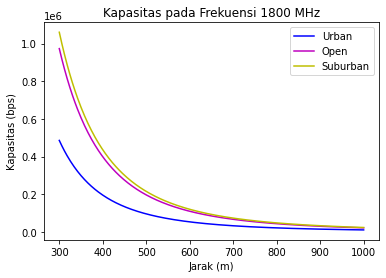

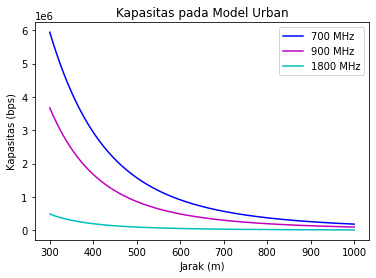

In [ ]:
#PLOT KAPASITAS
def graph_kp1():
  plt.figure()
  plt.plot(d,KP_Urban,'b', label='Urban')
  plt.plot(d,KP_Open,'m', label='Open')
  plt.plot(d,KP_Suburban,'y', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def graph_kp2():
  plt.figure()
  plt.plot(d,KP_700,'b', label='700 MHz')
  plt.plot(d,KP_900,'m', label='900 MHz')
  plt.plot(d,KP_1800,'c', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

graph_kp1()
graph_kp2()